In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary

import os
# remove local directory if it already exists
if os.path.isdir("ERA-V1-S7"):
    !rm -rf 'ERA-V1-S7'

!git clone https://github.com/pathToAIbyK/ERA-V1-S7.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'ERA-V1-S7'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 56 (delta 25), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (56/56), 13.80 KiB | 1009.00 KiB/s, done.


In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [5]:
#import a python module from inside the library
import sys
sys.path.insert(1,f'/content/ERA-V1-S7')


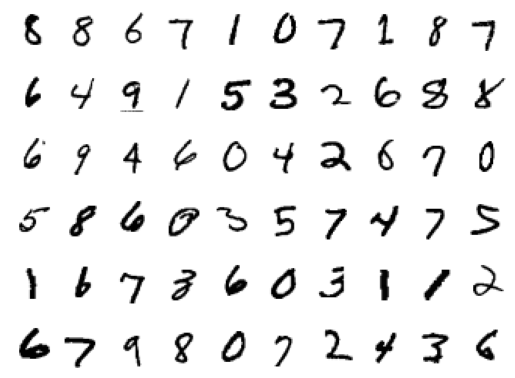

In [6]:
from utils import return_dataset_images

return_dataset_images(train_loader,60)

In [7]:
from model import Net_1,model_train,model_test

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net_1().to(device)
Net_1.model_summary(model,(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 28, 28]              40
            Conv2d-2            [-1, 4, 28, 28]             148
         MaxPool2d-3            [-1, 4, 14, 14]               0
            Conv2d-4            [-1, 8, 14, 14]             296
            Conv2d-5            [-1, 8, 14, 14]             584
         MaxPool2d-6              [-1, 8, 7, 7]               0
            Conv2d-7              [-1, 8, 5, 5]             584
            Conv2d-8              [-1, 4, 3, 3]             292
            Conv2d-9             [-1, 10, 1, 1]             370
Total params: 2,314
Trainable params: 2,314
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.08
Params size (MB): 0.01
Estimated Total Size (MB): 0.09
------------------------------------------

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    model_train(model, device, train_loader, optimizer, epoch)
    model_test(model, device, test_loader)

EPOCH: 0


Loss=2.3035733699798584 Batch_id=468 Accuracy=10.80: 100%|██████████| 469/469 [00:21<00:00, 22.04it/s]



Test set: Average loss: 2.3010, Accuracy: 1135/10000 (11.35%)

EPOCH: 1


Loss=2.2994213104248047 Batch_id=468 Accuracy=11.24: 100%|██████████| 469/469 [00:16<00:00, 27.74it/s]



Test set: Average loss: 2.3012, Accuracy: 1135/10000 (11.35%)

EPOCH: 2


Loss=2.300686836242676 Batch_id=468 Accuracy=11.24: 100%|██████████| 469/469 [00:16<00:00, 28.53it/s]



Test set: Average loss: 2.3011, Accuracy: 1135/10000 (11.35%)

EPOCH: 3


Loss=2.303488254547119 Batch_id=468 Accuracy=11.24: 100%|██████████| 469/469 [00:17<00:00, 26.64it/s]



Test set: Average loss: 2.3009, Accuracy: 1135/10000 (11.35%)

EPOCH: 4


Loss=2.29923939704895 Batch_id=468 Accuracy=11.24: 100%|██████████| 469/469 [00:16<00:00, 28.18it/s]



Test set: Average loss: 2.3011, Accuracy: 1135/10000 (11.35%)

EPOCH: 5


Loss=2.3046886920928955 Batch_id=468 Accuracy=11.24: 100%|██████████| 469/469 [00:18<00:00, 25.78it/s]



Test set: Average loss: 2.3013, Accuracy: 1135/10000 (11.35%)

EPOCH: 6


Loss=2.3003435134887695 Batch_id=468 Accuracy=11.24: 100%|██████████| 469/469 [00:16<00:00, 28.29it/s]



Test set: Average loss: 2.3011, Accuracy: 1135/10000 (11.35%)

EPOCH: 7


Loss=2.3008906841278076 Batch_id=468 Accuracy=11.24: 100%|██████████| 469/469 [00:17<00:00, 27.09it/s]



Test set: Average loss: 2.3012, Accuracy: 1135/10000 (11.35%)

EPOCH: 8


Loss=2.305750608444214 Batch_id=468 Accuracy=11.24: 100%|██████████| 469/469 [00:16<00:00, 28.19it/s]



Test set: Average loss: 2.3012, Accuracy: 1135/10000 (11.35%)

EPOCH: 9


Loss=2.2923691272735596 Batch_id=468 Accuracy=11.24: 100%|██████████| 469/469 [00:16<00:00, 27.99it/s]



Test set: Average loss: 2.3010, Accuracy: 1135/10000 (11.35%)

EPOCH: 10


Loss=2.295215129852295 Batch_id=468 Accuracy=11.24: 100%|██████████| 469/469 [00:16<00:00, 28.07it/s]



Test set: Average loss: 2.3011, Accuracy: 1135/10000 (11.35%)

EPOCH: 11


Loss=2.3055126667022705 Batch_id=339 Accuracy=11.27:  72%|███████▏  | 340/469 [00:13<00:05, 25.74it/s]


KeyboardInterrupt: ignored

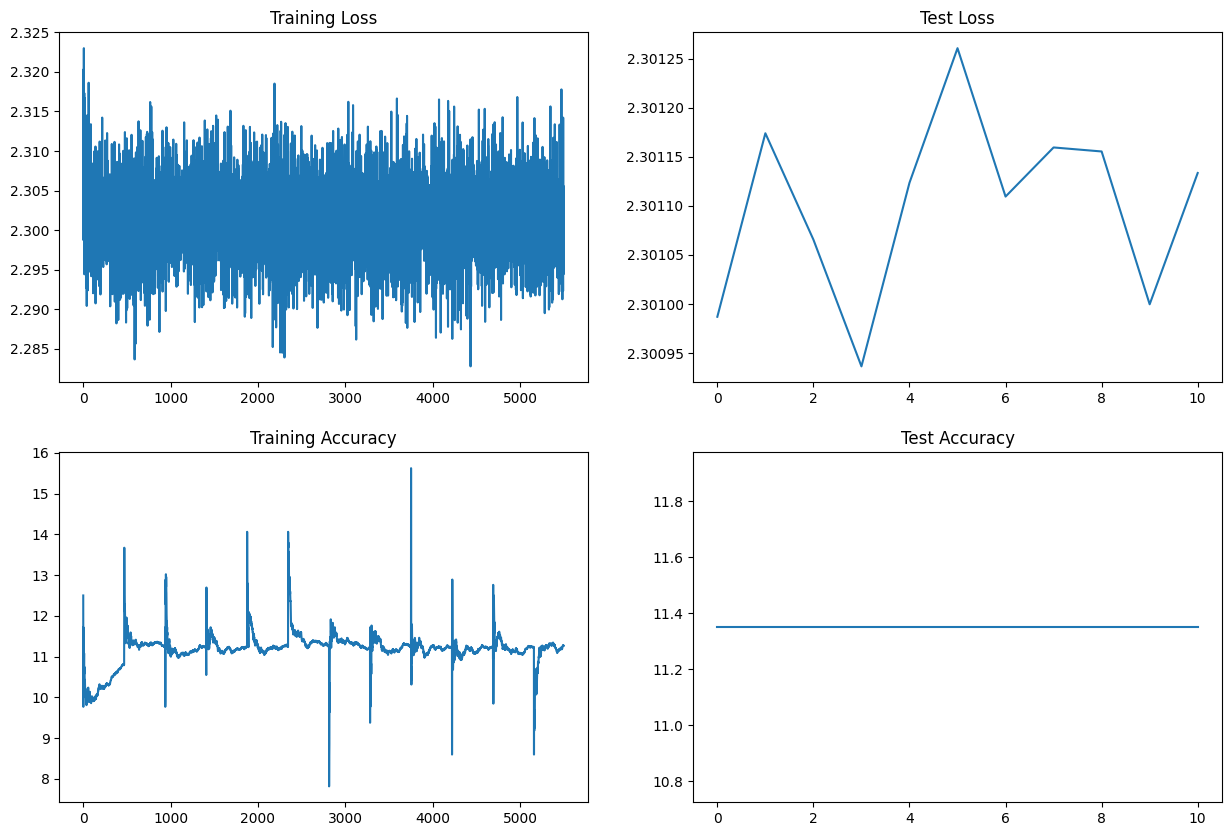

In [9]:
from model import draw_graph

draw_graph()